# Modeling

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
tf.debugging.set_log_device_placement(True)

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from PIL import Image


# Set the directory where your images are
dir_name = "plots"

# Get the list of all files in directory
all_files = os.listdir(dir_name)


# Get the list of input and output image files
input_img_paths = [os.path.join(dir_name, file) for file in all_files if "input" in file]
output_img_paths = [os.path.join(dir_name, file) for file in all_files if "output" in file]

# Sort the lists (this assumes that for each input file 'input_plot_n.png' there is an output file 'output_plot_n.png')
input_img_paths.sort()
output_img_paths.sort()

# Load the images and convert them to numpy arrays
input_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in input_img_paths])
output_imgs = np.array([np.array(Image.open(img_path)) / 255 for img_path in output_img_paths])

def crop_center(img, crop_width, crop_height):
    img_width, img_height = img.size
    return img.crop(((img_width - crop_width) // 2,
                     (img_height - crop_height) // 2,
                     (img_width + crop_width) // 2,
                     (img_height + crop_height) // 2))

# Get the dimensions of the first input image
image_shape = Image.open(input_img_paths[0]).size
crop_width, crop_height = image_shape

# Load and preprocess the data
input_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in input_img_paths])
output_imgs = np.array([img_to_array(crop_center(load_img(img_path), crop_width, crop_height)) / 255 for img_path in output_img_paths])



# Split the data into training and validation sets
input_train, input_val, output_train, output_val = train_test_split(input_imgs, output_imgs, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_imgs.shape[1:]),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(input_train, output_train, epochs=10, validation_data=(input_val, output_val))

# Predict on a new image
new_input_img = img_to_array(load_img("C:/Users/maxwe/Documents/Github repos/ChemProject/plots/input_plot_1.png")) / 255
new_output_img = model.predict(new_input_img[np.newaxis, ...])[0]


Epoch 1/10
3/3 [==============================] - 54s 12s/step - loss: 0.2157 - val_loss: 0.1321
Epoch 2/10
3/3 [==============================] - 32s 10s/step - loss: 0.0925 - val_loss: 0.0228
Epoch 3/10
3/3 [==============================] - 33s 10s/step - loss: 0.0212 - val_loss: 0.0206
Epoch 4/10
3/3 [==============================] - 33s 10s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 5/10
3/3 [==============================] - 34s 10s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 6/10
3/3 [==============================] - 31s 9s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 7/10
3/3 [==============================] - 27s 8s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 8/10
3/3 [==============================] - 27s 8s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 9/10
3/3 [==============================] - 27s 8s/step - loss: 0.0206 - val_loss: 0.0206
Epoch 10/10
1/1 [==============================] - 0s 226ms/step


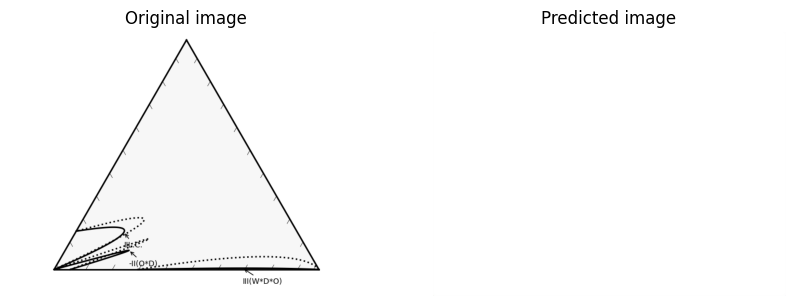

In [3]:
import matplotlib.pyplot as plt

# Convert the data type to uint8 and rescale the values to the 0-255 range
new_input_img_disp = np.clip(new_input_img * 255, 0, 255).astype('uint8')
new_output_img_disp = np.clip(new_output_img * 255, 0, 255).astype('uint8')

# Create a new figure
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(new_input_img_disp)
plt.title("Original image")
plt.axis("off")

# Display the predicted image
plt.subplot(1, 2, 2)
plt.imshow(new_output_img_disp)
plt.title("Predicted image")
plt.axis("off")

# Show the figure
plt.show()
